<a href="https://colab.research.google.com/github/tlaud1023/ITB2022/blob/main/ITB_%EB%B2%95%ED%95%99%EB%B6%802011681%EC%9D%B4%EC%8B%9C%EB%AA%85_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
%matplotlib inline 
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn 
!pip install --upgrade joblib==1.1.0
import mglearn

In [4]:
# 외부 화일을 가져와서 데이터프레임으로 저장하기 
fpath = 'https://raw.githubusercontent.com/tlaud1023/ITB2022/main/health_data.csv' #github에서 url로 바로 가져옴(raw)
hd = pd.read_csv(fpath) #url변수 삽입

print(type(hd))


#print(hd.columns)
#display(hd.info())

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#영문명 변수로 변경하기

hd= hd.rename(columns = {'기준년도': 'HCHK_YEAR'})
hd= hd.rename(columns = {'가입자일련번호': 'IDV_ID'})
hd= hd.rename(columns = {'시도코드': 'SIDO'})
hd= hd.rename(columns = {'성별코드': 'SEX'})
hd= hd.rename(columns = {'연령대코드(5세단위)': 'AGE_GROUP'})
hd= hd.rename(columns = {'신장(5Cm단위)': 'HEIGHT'})
hd= hd.rename(columns = {'체중(5Kg 단위)': 'WEIGHT'})
hd= hd.rename(columns = {'허리둘레': 'WAIST'})
hd= hd.rename(columns = {'시력(좌)': 'SIGHT_LEFT'})
hd= hd.rename(columns = {'시력(우)': 'SIGHT_RIGHT'})
hd= hd.rename(columns = {'청력(좌)': 'HEAR_LEFT'})
hd= hd.rename(columns = {'청력(우)': 'HEAR_RIGHT'})
hd= hd.rename(columns = {'수축기혈압': 'BP_HIGH'})
hd= hd.rename(columns = {'이완기혈압': 'BP_LWST'})
hd= hd.rename(columns = {'식전혈당(공복혈당)': 'BLDS'})
hd= hd.rename(columns = {'총콜레스테롤': 'TOT_CHOLE'})
hd= hd.rename(columns = {'트리글리세라이드': 'TRIGLYCERIDE'})
hd= hd.rename(columns = {'HDL콜레스테롤': 'HDL_CHOLE'})
hd= hd.rename(columns = {'LDL콜레스테롤': 'LDL_CHOLE'})
hd= hd.rename(columns = {'혈색소': 'HMG'})
hd= hd.rename(columns = {'요단백': 'OLIG_PROTE_CD'})
hd= hd.rename(columns = {'혈청크레아티닌': 'CREATININE'})
hd= hd.rename(columns = {'(혈청지오티)AST': 'SGOT_AST'})
hd= hd.rename(columns = {'(혈청지오티)ALT': 'SGPT_ALT'})
hd= hd.rename(columns = {'감마지티피': 'GAMMA_GTP'})
hd= hd.rename(columns = {'흡연상태': 'SMK_STAT_TYPE_CD'})
hd= hd.rename(columns = {'음주여부': 'DRK_YN'})
hd= hd.rename(columns = {'구강검진 수검여부': 'HCHK_OE_INSPEC_YN'})
hd= hd.rename(columns = {'치아우식증유무': 'CRS_YN'})
hd= hd.rename(columns = {'치석': 'TTR_YN'})
hd= hd.rename(columns = {'데이터공개일자': 'DATA_STD__DT'})

display(hd.info())

# 간질환 관리를 위한 모델 구축 하기

간질환은 간섬유화를 거쳐 간경변과 간암 등 중증으로 발전하면 치료제가 없어 회복이 불가능해 어느 질병보다 조기 예측 및 진단이 중요하다.

알고리즘 및 패키지 호출 

In [6]:
from sklearn.preprocessing import MinMaxScaler #정규화
from sklearn.tree import DecisionTreeClassifier as DTC #의사결정나무
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier as RFC #랜덤포레스트

**데이터 전처리 및 독립/종속변수 선택**

1) BMI 변수 생성 (독립변수)

2) 데이터셋 결측치 보간 및 결측행 제거

3) LIVER_DISEASE (종속변수) 생성 : SGOT_AST와 SGOT_ALT 모두 40을 초과하면 Y, 아니면 N

4) 독립변수 one hot incoding (더미변수로 변경)

In [7]:
# 1) BMI 변수 생성 (독립변수)
hd2 = hd.copy()
hd2['BMI'] = hd2['WEIGHT']/((hd2['HEIGHT']/100)**2) #bmi 변수 생성

In [10]:
#분석할 데이터셋(HD) 설정 - 결측치 보간 및 결측행 제거

#hd2.iloc[:,15:19] : 결측치가 제일 많은 열의 값 보간하기

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median") # median(중앙값)으로 보간
hd_impute = pd.DataFrame(imputer.fit_transform(hd2.iloc[:,15:19]))
print("\n중간값으로 보간:", hd_impute.shape)  

hd2.iloc[:,15:19] = hd_impute
#print(hd2.isna().sum())

HD = hd2.dropna() #결측행 제거
display(HD) #최종 데이터셋의 사례는 3237개


중간값으로 보간: (10000, 4)


,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,구강검진수검여부,CRS_YN,TTR_YN,DATA_STD__DT,BMI
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.343750
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,29.384757
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021,25.390625
12,2020,13,41,M,14,175,80,90.0,0.8,0.7,...,21.0,21.0,41.0,Yes,Yes,1,0.0,0.0,12/29/2021,26.122449
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021,25.390625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,2020,9982,11,M,12,170,70,88.0,1.2,1.0,...,31.0,39.0,42.0,NotNow,No,1,0.0,0.0,12/29/2021,24.221453
9982,2020,9983,42,F,13,155,55,81.5,1.0,0.9,...,27.0,20.0,22.0,No,Yes,1,1.0,1.0,12/29/2021,22.892820
9983,2020,9984,28,M,12,160,65,79.0,1.5,1.2,...,24.0,21.0,13.0,NotNow,Yes,1,0.0,0.0,12/29/2021,25.390625
9988,2020,9989,11,M,14,160,50,76.0,0.6,1.0,...,17.0,11.0,21.0,Yes,No,1,1.0,0.0,12/29/2021,19.531250


독립변수 및 종속변수 선택

> 종속변수 : SGOT_AST와 SGOT_ALT 모두 40을 초과하면 Y, 아니면 N

> 독립변수 : 간수치와 관련된 변수를 제외하여, 간수치를 제외하고 간질환 발생에 유의미한 변수를 알아보려고 함.
종속변수에 사용된 SGOT_AST,SGOT_ALT 제외 + 여성과 남성이 달라 애매하여 쓰지 못했던 변수 GAMMA_GTP 또한 제외 + 더미변수화



In [ ]:
# 종속 (target)변수 : LIVER_DISEASE => 간질환 의심 변수 생성

import numpy as np
conditions = [(HD['SGOT_AST'] > 40) & (HD['SGPT_ALT'] > 40),
              (HD['SGOT_AST'] <= 40) | (HD['SGPT_ALT'] <= 40)]

vals = ['Y','N']

HD['LIVER_DISEASE'] = np.select(conditions, vals)

y = HD[['LIVER_DISEASE']]
display(y)

In [13]:
#독립변수
X = HD.drop(['HCHK_YEAR','IDV_ID','SIDO','HEIGHT', 'WEIGHT',
       'WAIST','SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT','구강검진수검여부',
       'CRS_YN', 'TTR_YN', 'DATA_STD__DT','LIVER_DISEASE','SGOT_AST','SGPT_ALT', 'GAMMA_GTP'],axis =1)
X = pd.get_dummies(X) #더미변수 처리

In [14]:
HD.	LIVER_DISEASE.value_counts() #간질환 의심환자는 212명

N    3025
Y     212
Name: LIVER_DISEASE, dtype: int64

데이터셋 분할

In [15]:
# 데이터셋을 학습(train)과 테스트(test) 세트로 분할

from sklearn.model_selection import train_test_split #훈련 : 시험 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#시험 데이터 20 : 훈련 80으로 분류

In [16]:
# 훈련 데이터 비율
y_train.value_counts(normalize=True)

LIVER_DISEASE
N                0.933951
Y                0.066049
dtype: float64

In [17]:
# 테스트 데이터 비율
y_test.value_counts(normalize=True)

LIVER_DISEASE
N                0.936728
Y                0.063272
dtype: float64

**모델 1. 의사결정나무**

In [18]:
tree = DTC(random_state=0)  
tree.fit(X_train, y_train) #학습나무가 만들어짐
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.869


In [19]:
tree = DTC(max_depth=7, random_state=0) #깊이가 7
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.949
시험용 데이터 정확도: 0.927


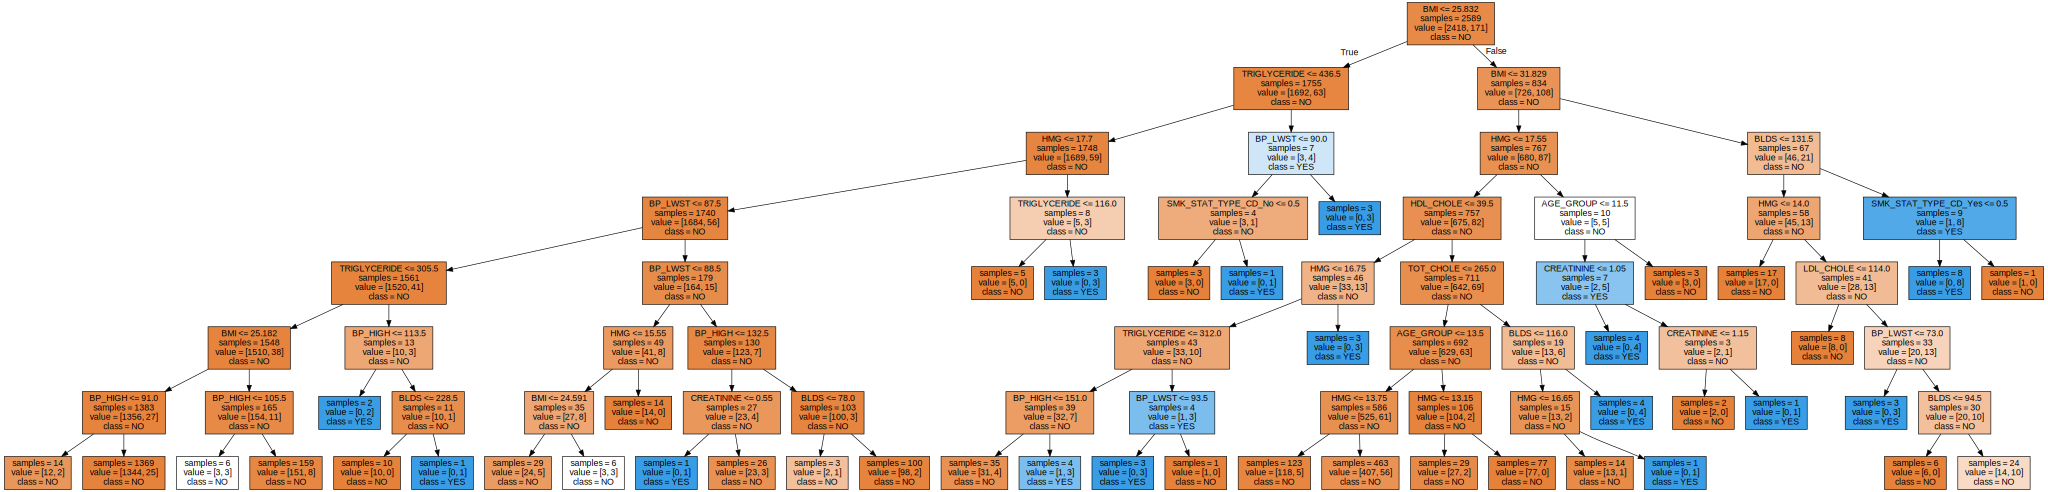

In [20]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "NO", "YES"],
                feature_names=X.columns[:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [21]:
result = tree.feature_importances_ #변수의 중요도 계산
print("변수의 중요도:\n", result) #print(df이름.columns)했을때 순서대로 나타남

변수의 중요도:
 [0.03706999 0.09758101 0.08354249 0.16869965 0.02009143 0.12087493
 0.03199898 0.02149335 0.15839118 0.         0.04693602 0.17806972
 0.         0.         0.01613193 0.         0.01911933 0.
 0.        ]


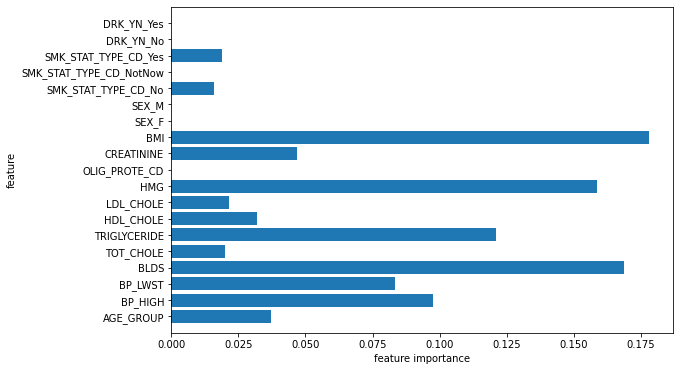

In [22]:
import numpy as np

def plot_feature_importances_hd(model): #변수중요도를 측정하여 보여주는 함수 정의
    plt.rcParams["figure.figsize"] = (9,6) #가로 9, 세로 6
    n_features = len(X.columns[:]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') #align = 'center' 막대가 눈금 중간에 오도록
    plt.yticks(np.arange(n_features), X.columns[:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_hd(tree)

중요도 1위 : BMI
- 비만과 간질환은 밀접한 관련을 가지고 있다는 것은 이미 잘 알고 있는 사실이다. 이 데이터셋 학습에서도 이 사실을 분명하게 보여준다. 알코올 섭취가 거의 없이 비만, 당뇨병 등 대사증후군으로 인해 발생하는 것을 비알코올성 지방간이라고 부른다. 이러한 비알코올성 지방간은 앞으로 가장 비만은 비알코올성 지방간의 가장 큰 원인으로 꼽히며, 복부비만과 관련이 매우 깊다고 한다.
- 참조 : [술 안 마셔도 '지방간'에 걸릴 수 있어... 80%는 비알코올성] https://www.hidoc.co.kr/healthstory/news/C0000747011
- 참조 : ["비알콜성 지방간, 10년 뒤 가장 중요한 만성질환 될 것"] https://www.medigatenews.com/news/104992943

중요도 2위 : 식전혈당(공복혈당)
- 간질환이 있거나 간에 지방이 과도하게 축적된경우에 포도당이 간에 제대로 저장되지 못해 공복 혈당이 높아질 수 있다고 한다.

중요도 3위 : 혈색소
- 혈색소침착증은 유전적으로 철분이 체내에 과잉 흡수 및 과잉 저장되는 유전 질환인데, 철분이 부적절하게  많이 흡수되면 간, 심장, 피부, 췌장, 관절, 고환 등에 철분이 과잉 저장되고, 이로 인해 질환이 유발된다고 한다.따라서 혈색소에 문제가 있으면 음주자가 아니더라도 간경화나 간암이 발생할 가능성이 있다.

중요도 4위 : 트리글리세라이드 
- 비만, 운동 부족, 흡연, 과음, 탄수화물 다량 섭취와 같은 생활습관에 의해 상승할 수 있는 요소로 BMI와 비슷한 이유로 중요도가 높음을 알 수 있다.

**모델 2. 랜덤포레스트**

In [23]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [24]:
# 100개의 나무 생성 (정확도가 높아짐)

forest = RFC(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.937


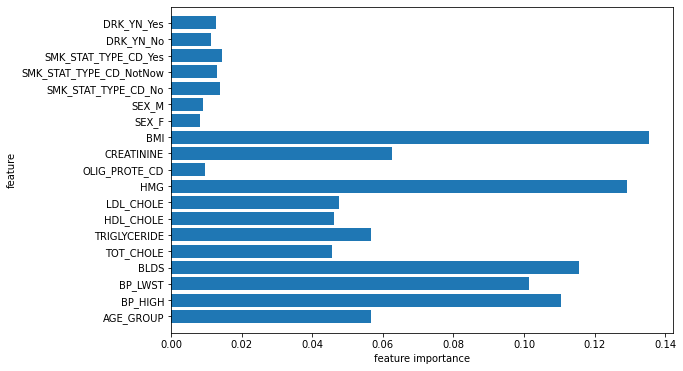

In [25]:
plot_feature_importances_hd(forest)

우선 전체적으로 변수의 중요도가 증가했다. 랜덤포레스트에서도 가장 중요한 변수는 BMI이나, BLDS(공복혈당)보다 HMG(혈색소)의 중요도가 더 높게 측정되었다. 또한, 의사결정나무에서는 트리글리세라이드보다 낮았던 수축기혈압의 중요도가 올라갔다.

In [26]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy
Decision tree:  [0.93436293 0.93822394 0.9034749  0.93822394 0.93822394 0.91891892
 0.92277992 0.91891892 0.8996139  0.92635659]
Random forest:  [0.93436293 0.93436293 0.93050193 0.93436293 0.93436293 0.93822394
 0.93050193 0.93436293 0.93050193 0.93410853]
Accuracy mean
Decision tree :0.924
Random forest :0.934


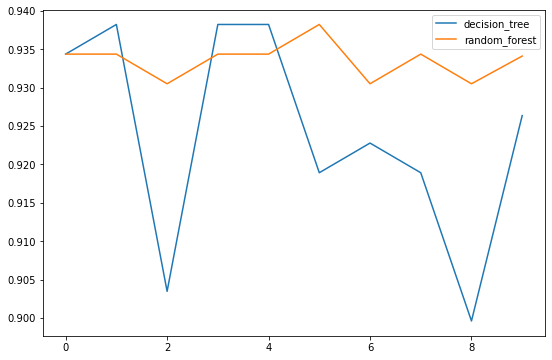

In [27]:
#의사결정나무와 랜덤포레스트 정확도 비교 시각화
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

**모델 3. 그래디언트부스팅**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [29]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.951
시험용 데이터 세트 정확도: 0.932


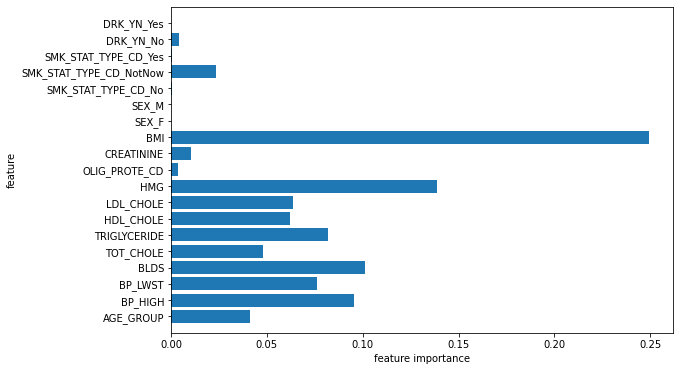

In [30]:
plot_feature_importances_hd(gbrt)

역시 가장 중요한 변수는 BMI로 측정되었다. BLDS(공복혈당)와 HMG(혈색소)의 중요도 차이가 더 벌어졌다.

**모델 평가 : 그리드서치**

In [31]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [32]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.930861,12,0.930475,0.930475,0.931634
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.933179,5,0.931634,0.932793,0.935110
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.926999,15,0.924681,0.925840,0.930475
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.931248,11,0.930475,0.931634,0.931634
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.932793,7,0.931634,0.931634,0.935110
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.929703,14,0.929316,0.931634,0.928158
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.931634,10,0.931634,0.932793,0.930475
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.933565,3,0.933951,0.931634,0.935110
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.930861,12,0.930475,0.930475,0.931634
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.932406,8,0.932793,0.933951,0.930475


In [33]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.9347


In [34]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.935
